In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, tree
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('modeling_data.csv', index_col = 'id')

In [3]:
df_m = df.drop(['created_at', 'deadline', 'launched_at', 'sub_category'], axis=1)

In [4]:
X, y = df_m.drop(['Failed'], axis=1), df_m.Failed

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.4,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5,random_state=42)

## Parameter Tuning

In [5]:
# param_grid= dict(
#     max_depth = list(range(3, 11)),
#     learning_rate = [0.05, 0.1],
#     n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 5)]
# )
# xg_grid_search = XGBClassifier()
# xg_grid = GridSearchCV(xg_grid_search, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
# xg_grid.fit(X_train, y_train)
# xg_grid_pred = xg_grid.predict(X_val)

# xg_best_params = xg_grid.best_params_
# xg_best_estimator = xg_grid.best_estimator_
# xg_best_cm = confusion_matrix(y_val, xg_grid_pred)
# xg_best_cr = classification_report(y_val, xg_grid_pred)

# xg_ac = xg_grid.score(X_val, y_val)
# xg_precision = precision_score(y_val, xg_grid_pred)
# xg_recall = recall_score(y_val, xg_grid_pred)
# xg_f1 = f1_score(y_val, xg_grid_pred)

# print(xg_best_params)
# print(xg_best_estimator)
# print('confusion matrix:')
# print(xg_best_cm)
# print(xg_best_cr)

In [6]:
# print(xg_best_params)

In [7]:
# print(xg_best_estimator)

In [8]:
# print('confusion matrix: \n', xg_best_cm)

In [9]:
# xg_y_score = xg_grid.predict_proba(X_val)[:,1]
# xg_grid_fpr, xg_grid_tpr, auc_thresholds = roc_curve(y_val, xg_y_score)
# roc_auc_xg_grid = auc(xg_grid_fpr, xg_grid_tpr)
# print(roc_auc_xg_grid)

# Run best parameters on Val and Test sets

## Val set

In [10]:
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#               importance_type='gain', interaction_constraints='',
#               learning_rate=0.1, max_delta_step=0, max_depth=5,
#               min_child_weight=1, missing=None, monotone_constraints='()',
#               n_estimators=275, n_jobs=4, num_parallel_tree=1, random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#               tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
xgBoost_v = XGBClassifier(learning_rate=0.1, n_estimators=275, max_depth=5)
xgBoost_v.fit(X_train, y_train)
xgBoost_pred_v = xgBoost_v.predict(X_val)

xgBoost_ac_v = xgBoost_v.score(X_val, y_val)
xgBoost_precision_v = precision_score(y_val, xgBoost_pred_v)
xgBoost_recall_v = recall_score(y_val, xgBoost_pred_v)
xgBoost_f1_v = f1_score(y_val, xgBoost_pred_v)

xgBoost_y_score_v = xgBoost_v.predict_proba(X_val)[:, 1]
xgBoost_fpr_v, xgBoost_tpr_v, auc_thresholds_v = roc_curve(y_val, xgBoost_y_score_v)
roc_auc_xgb_v = auc(xgBoost_fpr_v, xgBoost_tpr_v)

[16:49:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
xgBoost = XGBClassifier(learning_rate=0.1, n_estimators=275, max_depth=5)
xgBoost.fit(X_rem, y_rem)
xgBoost_pred = xgBoost.predict(X_test)

xgBoost_ac = xgBoost.score(X_test, y_test)
xgBoost_precision = precision_score(y_test, xgBoost_pred)
xgBoost_recall = recall_score(y_test, xgBoost_pred)
xgBoost_f1 = f1_score(y_test, xgBoost_pred)

xgBoost_y_score = xgBoost.predict_proba(X_test)[:, 1]
xgBoost_fpr, xgBoost_tpr, auc_thresholds = roc_curve(y_test, xgBoost_y_score)
roc_auc_xgb = auc(xgBoost_fpr, xgBoost_tpr)

[16:49:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [13]:
print('XGBoost val score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xgBoost_ac_v, 
         xgBoost_precision_v, 
         xgBoost_recall_v,
         xgBoost_f1_v,
         roc_auc_xgb_v)
     )
print('XGBoost test score: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (xgBoost_ac, 
         xgBoost_precision, 
         xgBoost_recall,
         xgBoost_f1,
         roc_auc_xgb)
     )

XGBoost val score: 
 Accuracy: 0.8451 
 Precision: 0.7387 
 Recall: 0.5158 
 F1: 0.6075 
 ROC: 0.8602
XGBoost test score: 
 Accuracy: 0.8823 
 Precision: 0.8385 
 Recall: 0.6134 
 F1: 0.7085 
 ROC: 0.9288


In [15]:
xgb_test_cf = confusion_matrix(y_test, xgBoost_pred)

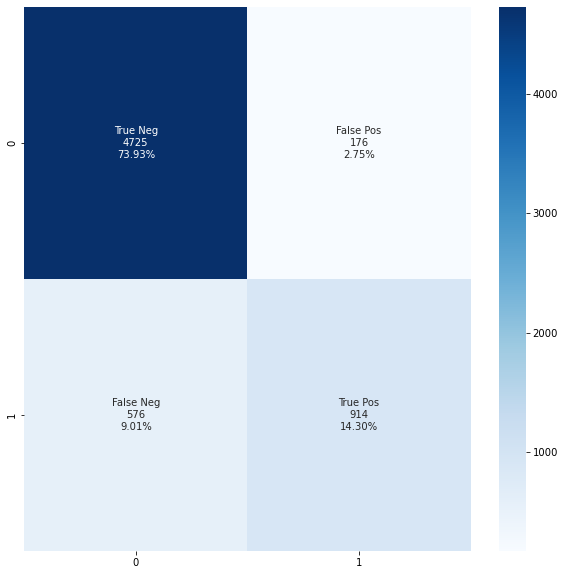

In [28]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                xgb_test_cf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in xgb_test_cf.flatten()/np.sum(xgb_test_cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (10,10))

sns_plot = sns.heatmap(xgb_test_cf, annot=labels, fmt="", cmap='Blues')
#sns_plot.savefig("test_heatmap.png")

results_path = 'results.png'
plt.savefig(results_path, dpi=400, facecolor='w')